In [57]:
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from copy import deepcopy
from transformers import AutoTokenizer
from tqdm.auto import tqdm

In [5]:
df = pd.read_csv('/opt/ml/HeungEol/Model/Data/Dataset/ready/cooked_HeungEol_Dataset_v1.0.csv', encoding = 'utf-8-sig')

In [17]:
df.head(10)

,제목,장르,gen_lyrics,gen_notes
0,J에게,발라드,난 오늘도 조용히 그댈 그리워하네 / 내 가슴 속깊이 여울져 남아 있네,14 / 13
1,J에게,발라드,난 이밤도 쓸쓸히 쓸쓸히 걷고 있네 / 난 이밤도 쓸쓸히 쓸쓸히 걷고 있네,14 / 14
2,J에게,발라드,쓸쓸히 걷고 있네,7
3,갯바위,포크/블루스,나는 나는 갯바위 / 당신은 나를 사랑하는 파도 / 어느 고운 바람 불던날,7 / 11 / 9
4,갯바위,포크/블루스,잔잔히 다가와 / 부드러운 손길로 나를 감싸고 / 향기로운 입술도 내게 주었지,6 / 12 / 12
5,갯바위,포크/블루스,세찬 비바람에 / 내몸이 패이고 / 이는 파도에 깨끗이 부서져도,6 / 6 / 12
6,갯바위,포크/블루스,나의 생은 당신의 / 조각품인것을 / 나는 당신으로 인해 / 아름다운 것을,7 / 6 / 8 / 6
7,갯바위,포크/블루스,나는 나는 갯바위 / 당신은 나를 사랑하는 파도 / 우린 오늘도 마주보며,7 / 11 / 9
8,갯바위,포크/블루스,이렇게 서있네 / 세찬 비바람에 내몸이 패이고 / 이는 파도에 깨끗이 부서져도,6 / 12 / 12
9,갯바위,포크/블루스,이렇게 서있네 / 나는 나는 갯바위 / 당신은 나를 사랑하는 파도,6 / 7 / 11


In [18]:
df.dropna(inplace=True)

In [19]:
df.isna().value_counts()

제목     장르     gen_lyrics  gen_notes
False  False  False       False        907545
Name: count, dtype: int64

In [20]:
df['units'] = [len(x.split(' / ')) for x in df.gen_notes]

In [21]:
df['units'][:10]

0    2
1    2
2    1
3    3
4    3
5    3
6    4
7    3
8    3
9    3
Name: units, dtype: int64

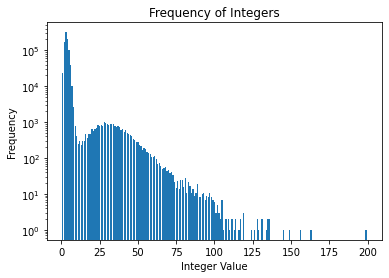

In [35]:
freq = Counter(df['units'])

sorted_units = sorted(freq.keys())

plt.bar(sorted_units, [freq[unit] for unit in sorted_units])

plt.xlabel('Integer Value')
plt.ylabel('Frequency')

plt.yscale('log')

plt.title('Frequency of Integers')

plt.show()

In [27]:
sorted(freq.items(), key=lambda x: x[1], reverse=True)

[(3, 318236),
 (4, 212681),
 (2, 172521),
 (5, 101252),
 (6, 39253),
 (1, 22749),
 (7, 10432),
 (8, 2691),
 (28, 995),
 (29, 948),
 (30, 912),
 (33, 911),
 (32, 900),
 (34, 863),
 (31, 848),
 (24, 845),
 (26, 824),
 (9, 797),
 (25, 797),
 (35, 789),
 (27, 766),
 (37, 762),
 (36, 749),
 (38, 718),
 (23, 671),
 (40, 662),
 (22, 656),
 (20, 639),
 (39, 598),
 (42, 594),
 (21, 565),
 (41, 549),
 (43, 492),
 (19, 478),
 (18, 470),
 (44, 455),
 (16, 454),
 (45, 429),
 (10, 409),
 (46, 405),
 (17, 370),
 (47, 343),
 (48, 312),
 (14, 307),
 (15, 298),
 (12, 296),
 (49, 284),
 (50, 279),
 (11, 246),
 (51, 228),
 (13, 226),
 (52, 219),
 (54, 188),
 (55, 175),
 (53, 172),
 (56, 150),
 (57, 142),
 (58, 131),
 (61, 111),
 (60, 108),
 (59, 106),
 (62, 92),
 (64, 72),
 (63, 68),
 (65, 62),
 (68, 56),
 (67, 54),
 (66, 50),
 (70, 48),
 (69, 44),
 (72, 40),
 (71, 39),
 (73, 34),
 (81, 27),
 (79, 25),
 (78, 24),
 (76, 23),
 (74, 22),
 (83, 21),
 (89, 19),
 (84, 17),
 (80, 16),
 (75, 15),
 (77, 14),
 (86,

In [40]:
len(df)

907545

In [29]:
df[df['units']>70]['장르'].value_counts()

장르
랩/힙합            241
인디음악, 록/메탈      109
댄스               82
발라드              54
인디음악, 포크/블루스     38
R&B/Soul          8
록/메탈              4
댄스, 랩/힙합          3
성인가요/트로트          1
댄스, R&B/Soul      1
발라드, 랩/힙합         1
랩/힙합, 인디음악        1
Name: count, dtype: int64

In [32]:
df_truncated = df[df['units']<70]

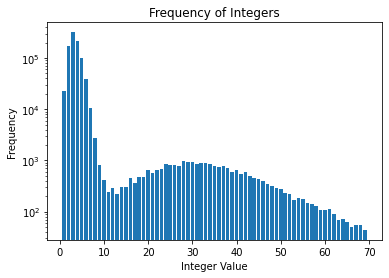

In [34]:
freq = Counter(df_truncated['units'])

sorted_units_truncated = sorted(freq.keys())

plt.bar(sorted_units_truncated, [freq[unit] for unit in sorted_units_truncated])

plt.xlabel('Integer Value')
plt.ylabel('Frequency')

plt.yscale('log')

plt.title('Frequency of Integers')

plt.show()

In [41]:
len(df_truncated)

906954

In [37]:
df_genre_filtered = deepcopy(df_truncated)

In [46]:
df_genre_filtered = df_genre_filtered[~df_genre_filtered['장르'].str.contains('랩')]
df_genre_filtered = df_genre_filtered[~df_genre_filtered['장르'].str.contains('CCM')]
df_genre_filtered = df_genre_filtered[~df_genre_filtered['장르'].str.contains('J-POP')]
df_genre_filtered = df_genre_filtered[~df_genre_filtered['장르'].str.contains('-')]

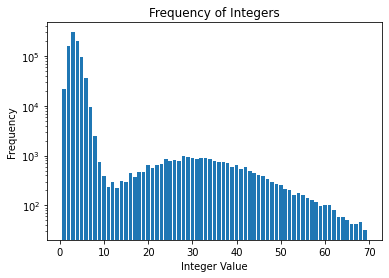

In [47]:
freq = Counter(df_genre_filtered['units'])

sorted_units_genre_filtered = sorted(freq.keys())

plt.bar(sorted_units_genre_filtered, [freq[unit] for unit in sorted_units_genre_filtered])

plt.xlabel('Integer Value')
plt.ylabel('Frequency')

plt.yscale('log')

plt.title('Frequency of Integers')

plt.show()

In [48]:
len(df_genre_filtered)

858463

In [49]:
df_genre_filtered['장르'].value_counts()

장르
인디음악, 록/메탈               377501
인디음악, 포크/블루스             269496
발라드                       92281
댄스                        67339
록/메탈                      17681
R&B/Soul                  15223
성인가요/트로트                   5340
포크/블루스                     4586
발라드, 국내드라마                 2348
발라드, R&B/Soul               798
일렉트로니카                      600
발라드, 인디음악                   586
국내드라마                       556
발라드, 록/메탈                   551
발라드, 국내영화                   430
록/메탈, 국내드라마                 371
인디음악, 록/메탈, 일렉트로니카          348
인디음악, 록/메탈, 포크/블루스          319
발라드, 포크/블루스                 314
발라드, 인디음악, 포크/블루스           214
R&B/Soul, 인디음악              196
국내영화                        195
댄스, R&B/Soul                155
록/메탈, 포크/블루스                124
발라드, 인디음악, 록/메탈             117
발라드, 성인가요/트로트               102
인디음악, 일렉트로니카                 93
발라드, R&B/Soul, 국내드라마         90
R&B/Soul, 인디음악, 록/메탈         81
포크/블루스, 국내드라마                62
댄스, 국내영화                     53
발라드, 

In [53]:
tokenizer = AutoTokenizer.from_pretrained('beomi/KoAlpaca-Polyglot-12.8B')

In [54]:
tokenizer('댄스, 인디음악, 포크/블루스')

{'input_ids': [13468, 15, 10859, 4987, 15, 17721, 18, 10734, 387], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [72]:
freq = [len(x) for x in tokenizer(list(df_genre_filtered.gen_lyrics))['input_ids']]

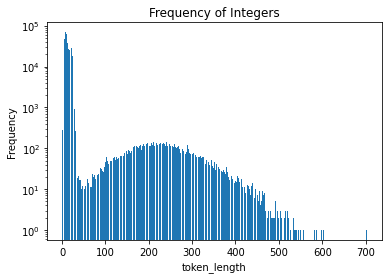

In [75]:
freq = Counter(freq)

sorted_token_length = sorted(freq.keys())

plt.bar(sorted_token_length, [freq[unit] for unit in sorted_token_length])

plt.xlabel('token_length')
plt.ylabel('Frequency')

plt.yscale('log')

plt.title('Frequency of Integers')

plt.show()

In [79]:
instruction = "다음 조건에 어울리는 가사를 생성하시오. 주어진 음절 수를 절대 벗어나지 말 것. 제목과 장르에 어울려야 할 것. 생성 형식은 ['가사 // 가사 // 가사 // 가사']와 같음."
title = '세상에 이정도면 정말 긴 제목이다'
genre = '일렉트로니카'
notes = '10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / '
        

prompt = f"### Instruction(명령어):\n{instruction}\n\n### Input(입력):\n음절 수는 [{notes}], 제목은 [{title}], 본문은 [{genre}]이다.\n\n### Response(응답): \n"

In [80]:
prompt

"### Instruction(명령어):\n다음 조건에 어울리는 가사를 생성하시오. 주어진 음절 수를 절대 벗어나지 말 것. 제목과 장르에 어울려야 할 것. 생성 형식은 ['가사 // 가사 // 가사 // 가사']와 같음.\n\n### Input(입력):\n음절 수는 [10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / 10 / ], 제목은 [세상에 이정도면 정말 긴 제목이다], 본문은 [일렉트로니카]이다.\n\n### Response(응답): \n"

In [81]:
len(tokenizer(prompt)['input_ids'])

194